# Vamos calcular a taxa de Retorno de um Portifólio/cateira de investimento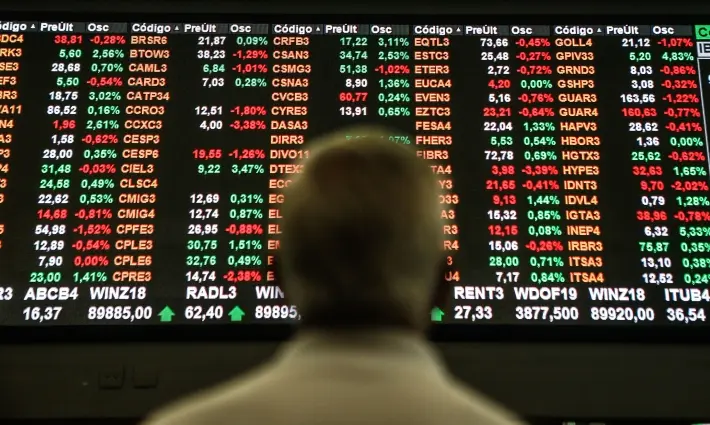

### Vamos começar importando as bibliotecas que serão necessarias

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Vamos extrair os dados de cada um dos papeis usando o 'Yahoo Finance' como fonte de dados.
#### Faremos uma analise dos ultimos 10 anos

In [8]:
Petrobras = 'PETR4.SA'
Itau = 'ITUB4.SA'
Vale = 'VALE3.SA'
Ambev = 'ABEV3.SA'

In [9]:
ptf = [Petrobras, Itau, Vale, Ambev]
mydata = pd.DataFrame()
for i in ptf:
    mydata[i] = wb.DataReader(i, data_source='yahoo', start='2011-4-8')['Adj Close']

### Conferindo os dados

In [10]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2476 entries, 2011-04-08 to 2021-04-08
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  2476 non-null   float64
 1   ITUB4.SA  2476 non-null   float64
 2   VALE3.SA  2476 non-null   float64
 3   ABEV3.SA  2476 non-null   float64
dtypes: float64(4)
memory usage: 96.7 KB


In [11]:
mydata.head()

,PETR4.SA,ITUB4.SA,VALE3.SA,ABEV3.SA
Date,,,,
2011-04-08,22.622120,11.349495,33.739857,5.455349
2011-04-11,22.202150,11.265096,33.784416,5.497747
2011-04-12,21.523729,11.207816,33.103256,5.441216
2011-04-13,21.119902,11.213839,32.625805,5.441216
2011-04-14,20.982601,11.105323,33.036995,5.561346


In [12]:
mydata.tail()

,PETR4.SA,ITUB4.SA,VALE3.SA,ABEV3.SA
Date,,,,
2021-04-01,23.889999,27.100000,97.389999,15.00
2021-04-05,24.040001,27.450001,103.389999,15.27
2021-04-06,24.020000,27.129999,102.050003,15.39
2021-04-07,24.000000,26.889999,104.760002,15.20
2021-04-08,23.459999,26.850000,105.040001,15.51


### Normalizando os dados para base 100 para uma comparação visual

In [24]:
mydata.iloc[0]

PETR4.SA    22.622120
ITUB4.SA    11.349495
VALE3.SA    33.739857
ABEV3.SA     5.455349
Name: 2011-04-08 00:00:00, dtype: float64

In [27]:
normalizando = (mydata / mydata.iloc[0] * 100)

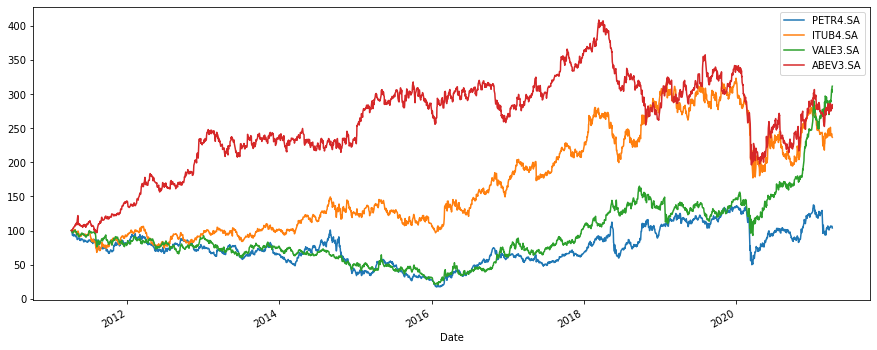

In [28]:
normalizando.plot(figsize=(15,6))

### Calculando o retorno do Portifolio
### Vamos usar a biblioteca Numpy criando uma matriz onde vamos atribuir peso para cada uma de nossas ações
#### No exemplo a seguir assumiremos que os nossos papeis tem pesos iguais ou seja 25%

In [29]:
retorno = (mydata / mydata.shift(1)) -1
retorno.head()

,PETR4.SA,ITUB4.SA,VALE3.SA,ABEV3.SA
Date,,,,
2011-04-08,NaN,NaN,NaN,NaN
2011-04-11,-0.018565,-0.007436,0.001321,0.007772
2011-04-12,-0.030557,-0.005085,-0.020162,-0.010283
2011-04-13,-0.018762,0.000537,-0.014423,0.000000
2011-04-14,-0.006501,-0.009677,0.012603,0.022078


In [30]:
peso = np.array([0.25, 0.25, 0.25, 0.25])

In [31]:
peso_individual = np.dot(retorno, peso)
peso_individual

array([        nan, -0.00422713, -0.01652146, ..., -0.00439791,
        0.00113274, -0.00023   ])

In [32]:
retorno.mean()

PETR4.SA    0.000503
ITUB4.SA    0.000559
VALE3.SA    0.000839
ABEV3.SA    0.000564
dtype: float64

In [33]:
retorno_anual = retorno.mean()*250
retorno_anual

PETR4.SA    0.125792
ITUB4.SA    0.139699
VALE3.SA    0.209693
ABEV3.SA    0.140898
dtype: float64

In [34]:
retorno_anual_carteira = np.dot(retorno_anual, peso)
retorno_anual_carteira

0.15402057638168046

In [39]:
Retorno_portifolio_peso1 = (str(round(np.dot(retorno_anual, peso), 4) * 100) + '%')

In [40]:
Retorno_portifolio_peso1

'15.4%'

 #### No proximo exemplo vamos assumir o peso de 40% para PTR4, 5% para ITUB4, 40% para VALE3 e 15% para ABEV3

In [61]:
peso2 = np.array([0.4, 0.05, 0.4, 0.15])

In [62]:
Retorno_portifolio_peso2 = (str(round(np.dot(retorno_anual, peso2), 4) * 100) + '%')

In [65]:
print(Retorno_portifolio_peso2)

16.23%


### Abaixo podemos observar que o segundo exemplo leva vantagem em relação ao primeiro

In [67]:
print('Portifolio Peso1: ' + Retorno_portifolio_peso1)
print('Portifolio Peso2: ' + Retorno_portifolio_peso2)

Portifolio Peso1: 15.4%
Portifolio Peso2: 16.23%


# Vamos estudando e evoluido... É isso, obrigado por vir ate aqui!